In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks', rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [2]:
import sys
import subprocess
import numpy as np
import pandas as pd
from decimal import Decimal

In [3]:
def count_patterns(file):
    command = "LC_ALL=C sort -u "
    command += (" -S " + str(1024 - 10) + "M" +
               " -T " + '/tmp' +
               " " + file +
               " | wc -l")

    p = subprocess.check_output(command, shell=True,
                                universal_newlines=True)
    return float(Decimal(0.05/float(p.rstrip())))

In [4]:
res = []
for sim in [
            'sim_1',
            'sim_2',
           ]:
    for round in range(10):
        for eff in [0, 1, 1.5, 2, 2.5]:
            try:
                v = f'../out/sim/{sim}/simulations/phenSim/{round}/phenSim.par'
                cc = pd.read_csv(v, sep='\t')
                cc['pos'] = [int(x.split(':')[1]) for x in cc['QTL'].values]
                cc.index = [x.replace(':', '_') for x in cc['QTL']]
                cc = cc[cc['Effect'] > 0]
                cc = cc[cc['Effect'] >= eff]
                m = pd.read_csv(f'../out/sim/{sim}/associations/{round}/vcf.tsv',
                                sep='\t', index_col=0)
                tm = count_patterns(f'../out/sim/{sim}/associations/{round}/patterns.txt')
                n = pd.read_csv(f'../out/sim/{sim}/associations/{round}/vcf.5000.tsv',
                                sep='\t', index_col=0)
                tn = count_patterns(f'../out/sim/{sim}/associations/{round}/patterns.5000.txt')
                o = pd.read_csv(f'../out/sim/{sim}/associations/{round}/vcf.1000.tsv',
                                sep='\t', index_col=0)
                to = count_patterns(f'../out/sim/{sim}/associations/{round}/patterns.1000.txt')

                t = m.join(cc, how='inner')
                tmp = t[t['lrt-pvalue'] <= tm]
                res.append((sim, round, 10000, tm,
                            len(m.index),
                            len(tmp.index),
                            len(cc.index),
                            len(tmp.index) / len(cc.index),
                            len(tmp.index) / len(m.index),
                            eff))
                t = n.join(cc, how='inner')
                tmp = t[t['lrt-pvalue'] <= tn]
                res.append((sim, round, 5000, tn,
                            len(n.index),
                            len(tmp.index),
                            len(cc.index),
                            len(tmp.index) / len(cc.index),
                            len(tmp.index) / len(n.index),
                            eff))
                t = o.join(cc, how='inner')
                tmp = t[t['lrt-pvalue'] <= to]
                res.append((sim, round, 1000, to,
                            len(o.index),
                            len(tmp.index),
                            len(cc.index),
                            len(tmp.index) / len(cc.index),
                            len(tmp.index) / len(o.index),
                            eff))
            except:
                pass
r = pd.DataFrame(res, columns=['sim',
                               'round', 'size', 'threshold',
                               'passing', 'found', 'all',
                               'power', 'precision', 'eff'])

In [5]:
r['heritability'] = ['high' if x == 'sim_1'
                     else 'low'
                     for x in r['sim'].values]

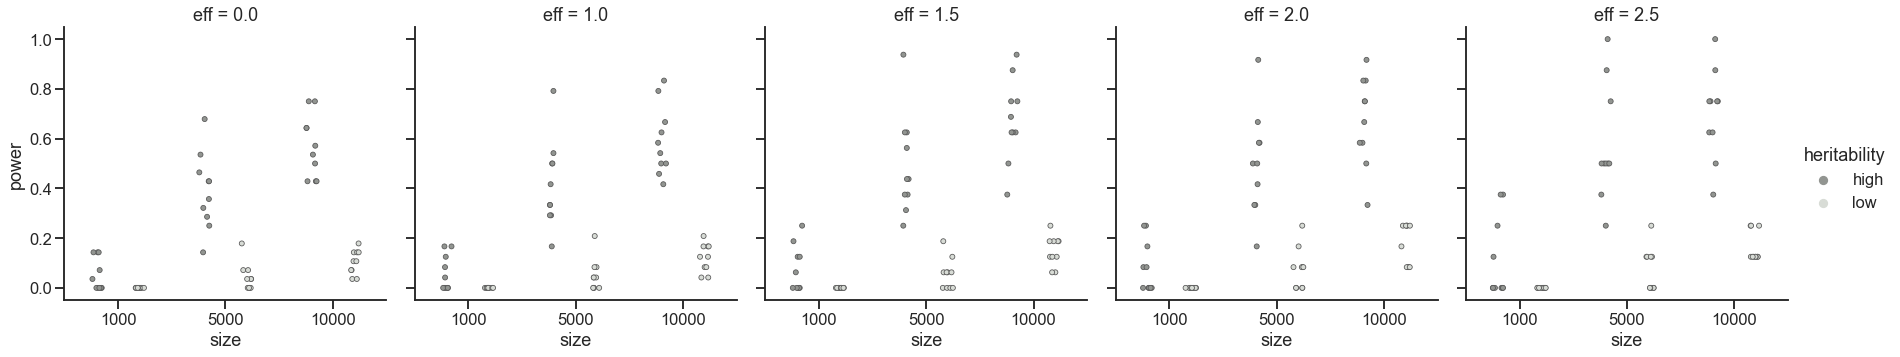

In [6]:
sns.catplot(data=r,
            x='size',
            y='power',
            col='eff',
            dodge=True,
            hue='heritability',
            palette=['xkcd:grey', 'xkcd:light grey'],
            linewidth=0.8
           );

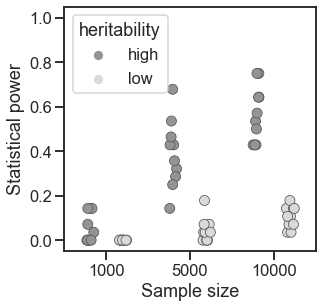

In [7]:
plt.figure(figsize=(4.5, 4.5))

sns.stripplot(data=r[r['eff'] == 0],
              size=10,
            x='size',
            y='power',
            dodge=True,
            hue='heritability',
            palette=['xkcd:grey', 'xkcd:light grey'],
            linewidth=0.8
           )

plt.legend(loc='upper left',
           frameon=True,
           facecolor='w',
           title='heritability')

plt.ylim(-0.05, 1.05)
plt.xlabel('Sample size')
plt.ylabel('Statistical power')
sns.despine(top=False,
            right=False)

plt.savefig('simulations.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('simulations.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

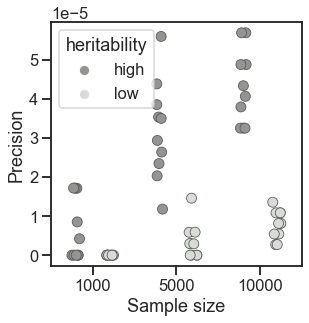

In [8]:
plt.figure(figsize=(4.5, 4.5))

sns.stripplot(data=r[r['eff'] == 0],
              size=10,
            x='size',
            y='precision',
            dodge=True,
            hue='heritability',
            palette=['xkcd:grey', 'xkcd:light grey'],
            linewidth=0.8
           )

plt.legend(loc='upper left',
           frameon=True,
           facecolor='w',
           title='heritability')

# plt.ylim(-0.05, 1.05)
plt.xlabel('Sample size')
plt.ylabel('Precision')
sns.despine(top=False,
            right=False)

plt.savefig('simulations_1.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('simulations_1.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [9]:
r[r['eff'] == 0]

,sim,round,size,threshold,passing,found,all,power,precision,eff,heritability
0,sim_1,0,10000,2.853393e-07,369356,18,28,0.642857,0.000049,0.0,high
1,sim_1,0,5000,3.118432e-07,341375,9,28,0.321429,0.000026,0.0,high
2,sim_1,0,1000,4.146625e-07,233999,0,28,0.000000,0.000000,0.0,high
15,sim_1,1,10000,2.853393e-07,369356,21,28,0.750000,0.000057,0.0,high
16,sim_1,1,5000,3.124199e-07,339762,19,28,0.678571,0.000056,0.0,high
17,sim_1,1,1000,4.209853e-07,238232,1,28,0.035714,0.000004,0.0,high
30,sim_1,2,10000,2.853393e-07,369356,21,28,0.750000,0.000057,0.0,high
31,sim_1,2,5000,3.122736e-07,339776,12,28,0.428571,0.000035,0.0,high
32,sim_1,2,1000,4.129228e-07,235016,2,28,0.071429,0.000009,0.0,high
45,sim_1,3,10000,2.853393e-07,369356,15,28,0.535714,0.000041,0.0,high


In [10]:
r[(r['eff'] == 0) & (r['size'] == 1000)]

,sim,round,size,threshold,passing,found,all,power,precision,eff,heritability
2,sim_1,0,1000,4.146625e-07,233999,0,28,0.000000,0.000000,0.0,high
17,sim_1,1,1000,4.209853e-07,238232,1,28,0.035714,0.000004,0.0,high
32,sim_1,2,1000,4.129228e-07,235016,2,28,0.071429,0.000009,0.0,high
47,sim_1,3,1000,4.148792e-07,237186,0,28,0.000000,0.000000,0.0,high
62,sim_1,4,1000,4.154998e-07,239364,0,28,0.000000,0.000000,0.0,high
77,sim_1,5,1000,4.147897e-07,233929,4,28,0.142857,0.000017,0.0,high
92,sim_1,6,1000,4.168682e-07,233224,4,28,0.142857,0.000017,0.0,high
107,sim_1,7,1000,4.195264e-07,233166,4,28,0.142857,0.000017,0.0,high
122,sim_1,8,1000,4.173100e-07,234683,0,28,0.000000,0.000000,0.0,high
137,sim_1,9,1000,4.125719e-07,235615,0,28,0.000000,0.000000,0.0,high


In [11]:
r[r['eff'] == 0].groupby(['sim', 'size']).median()

round     threshold   passing  found   all     power  precision  \
sim   size                                                                     
sim_1 1000     4.5  4.151895e-07  234849.5    0.5  28.0  0.017857   0.000002   
      5000     4.5  3.122180e-07  341142.0   11.0  28.0  0.392857   0.000032   
      10000    4.5  2.853393e-07  369356.0   15.5  28.0  0.553571   0.000042   
sim_2 1000     4.5  4.151895e-07  234854.5    0.0  28.0  0.000000   0.000000   
      5000     4.5  3.122180e-07  341142.0    1.0  28.0  0.035714   0.000003   
      10000    4.5  2.853393e-07  369356.0    3.0  28.0  0.107143   0.000008   

             eff  
sim   size        
sim_1 1000   0.0  
      5000   0.0  
      10000  0.0  
sim_2 1000   0.0  
      5000   0.0  
      10000  0.0

In [12]:
r[r['eff'] == 0].groupby(['sim', 'size']).mean()

round     threshold   passing  found   all     power  precision  \
sim   size                                                                     
sim_1 1000     4.5  4.160016e-07  235441.4    1.5  28.0  0.053571   0.000006   
      5000     4.5  3.120378e-07  341150.1   10.9  28.0  0.389286   0.000032   
      10000    4.5  2.853393e-07  369356.0   15.9  28.0  0.567857   0.000043   
sim_2 1000     4.5  4.160016e-07  235442.4    0.0  28.0  0.000000   0.000000   
      5000     4.5  3.120378e-07  341150.1    1.2  28.0  0.042857   0.000004   
      10000    4.5  2.853393e-07  369356.0    2.9  28.0  0.103571   0.000008   

             eff  
sim   size        
sim_1 1000   0.0  
      5000   0.0  
      10000  0.0  
sim_2 1000   0.0  
      5000   0.0  
      10000  0.0